# 상수도 관망구조 이상치 탐지
---

- 관망구조를 고려해도 된다!
- 이상치가 무엇인지 고려하는 게 매우 중요!

---
# Q,M,P의 관계

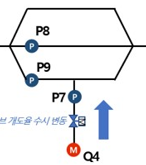

- Q와 P
  - 인접한 Q와 P는 상관성이 매우 크다.
- M과 P
  - M에 따라 P는 유압계의 평균 수준이 달라지거나, 유지되는 경향이 있다.
  - 이는 Q에서도 동일하게 나타남
- M이란 변수가 변화함에 따라 데이터를 추출해야 유리할 것으로 보임
- P와 P -> 인접할수록 매우 큰 상관성

# 왜 이상치일까?
- 대회에서 제공한 anomaly는 무슨 기준으로 측정된 것일까?
  - 가정1 : 인접한 P와 낮은 연관성을 가진 P인 경우 -> 인접한 P들에서 이상치 제대로 탐지가 안되었음
  - 가정2 : 인접한 Q와 낮은 연관성을 가진 P인 경우 
  - 가정3 : M 변수가 변화함에 있어 P가 올바르게 변화하지 않은 경우
 
---

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_A = pd.read_csv("data/TRAIN_A.csv")
df_true = df_A[df_A["anomaly"] == 1].iloc[:,1:(5+14+26+1)]

##########################################################################################
M = df_A.T[[df_A.columns[i][0] == 'M' for i in range(len(df_A.columns))]].T # M변수 추출

lst = [] 

for i in range(len(M)-1):
    '''
    M 변화가 생기는 포인트를 찾는 알고리즘
    M1~M14 변수의 이전 시점과 다음시점의 차가 동일하면 true 반환 else false 반환
    false가 반환되는 데이터의 인덱스를 추출 ->  M 변화가 있는 인덱스를 반환
    '''
    a= np.array(M.iloc[i,:]-M.iloc[i+1,:] == 0)*1
    lst.append(a)
    
sumM = pd.DataFrame(np.array(lst).sum(axis=1)) # sum을 통한 수가 다른 포인트를 찾는다.
indexM = sumM[(sumM != 14).values.flatten()].index.values # 인덱스 반환
##########################################################################################


## 가정2 : 인접한 Q와 낮은 상관성을 띄는 경우 

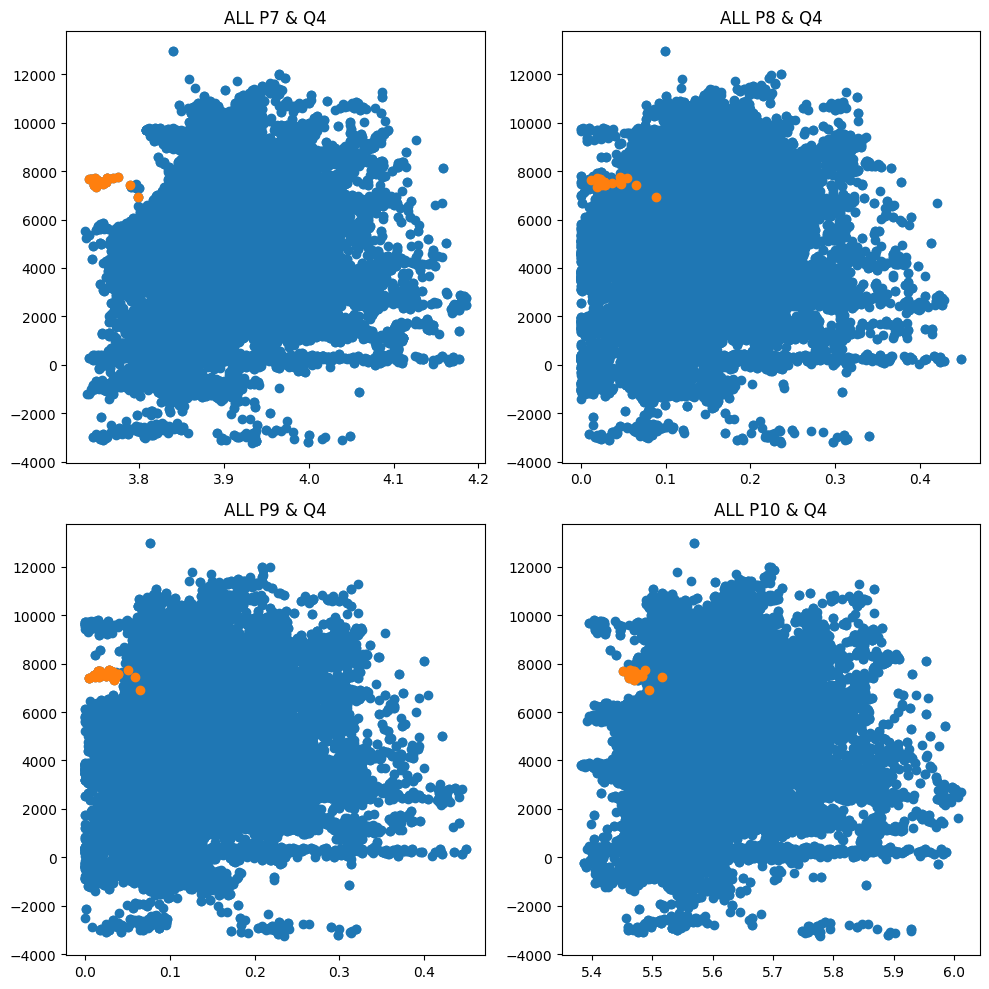

In [8]:
nn = round(np.median(df_true.index))
fig, ax =plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(df_A['P7'],df_A['Q4'])
ax[0,0].scatter(df_true['P7'],df_true['Q4'])
ax[0,0].set_title('ALL P7 & Q4')

ax[0,1].scatter(df_A['P8'],df_A['Q4'])
ax[0,1].scatter(df_true['P8'],df_true['Q4'])
ax[0,1].set_title('ALL P8 & Q4')

ax[1,1].scatter(df_A['P10'],df_A['Q4'])
ax[1,1].scatter(df_true['P10'],df_true['Q4'])
ax[1,1].set_title('ALL P10 & Q4')

ax[1,0].scatter(df_A['P9'],df_A['Q4'])
ax[1,0].scatter(df_true['P9'],df_true['Q4'])
ax[1,0].set_title('ALL P9 & Q4')

#ax[0].axvline(x=nn, color='red', linestyle='--', linewidth=1)
#ax[1].axvline(x=nn, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

- Q와의 상관성만으로는 이상치를 찾기는 매우 어려워보인다.
- 인접한 P와 크게 다른점이 전혀 나타나지 않음
- 인접한 P가 이상치가 아닌 이유를 제시하기가 어렵다

## 가정3 : M 변수가 변화함에 있어 P가 올바르게 변화하지 않은 경우
- M 변화가 없을 때 -> P의 추세나 수준, 변동은 변하지 않을 것이다.
- M 변화가 있을 때 -> P의 추세나 수준, 변동이 변할 것이다.

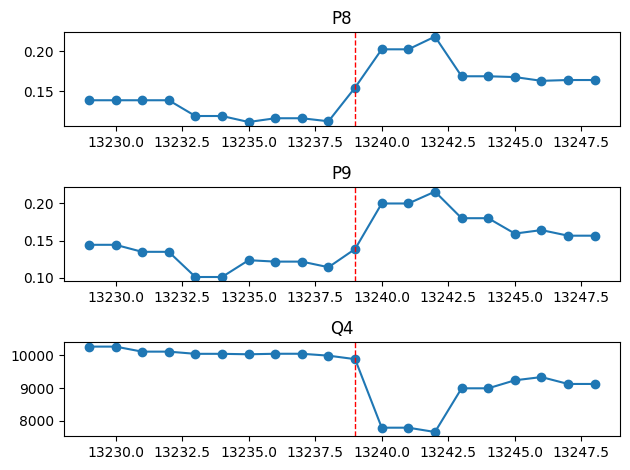

In [9]:

nn = 50
fig, ax = plt.subplots(3, 1)

# P8 플롯
ax[0].plot(df_A[['P8']].iloc[indexM[nn]-10:indexM[nn]+10, :], linestyle='-', marker='o')
ax[0].set_title('P8')
#ax[0].legend()

# P9 플롯
ax[1].plot(df_A[['P9']].iloc[indexM[nn]-10:indexM[nn]+10, :], linestyle='-', marker='o')
ax[1].set_title('P9')
#ax[1].legend()

# Q4 플롯
ax[2].plot(df_A[['Q4']].iloc[indexM[nn]-10:indexM[nn]+10, :], linestyle='-', marker='o')
ax[2].set_title('Q4')
#ax[2].legend()

# 수직선 표시
ax[0].axvline(x=indexM[nn], color='red', linestyle='--', linewidth=1)
ax[1].axvline(x=indexM[nn], color='red', linestyle='--', linewidth=1)
ax[2].axvline(x=indexM[nn], color='red', linestyle='--', linewidth=1)

# 레이아웃 조정
plt.tight_layout()
plt.show()

`-` M 변화가 있는 포인트 중심으로 그린 시도표

- red 선은 M 변화가 일어난 시점이다.
- red 선을 기준으로 좌우를 비교해보면 P와 Q가 서로 강한 상관성이 있을 것으로 추측.

- 인접한 P들끼리는 매우 높은 상관성을 띄고 있음을 것.
- 또한 M 변화에 따른 시계열 데이터의 추세나, 수준, 변동의 변화가 있을 것임을 알 수 있다.

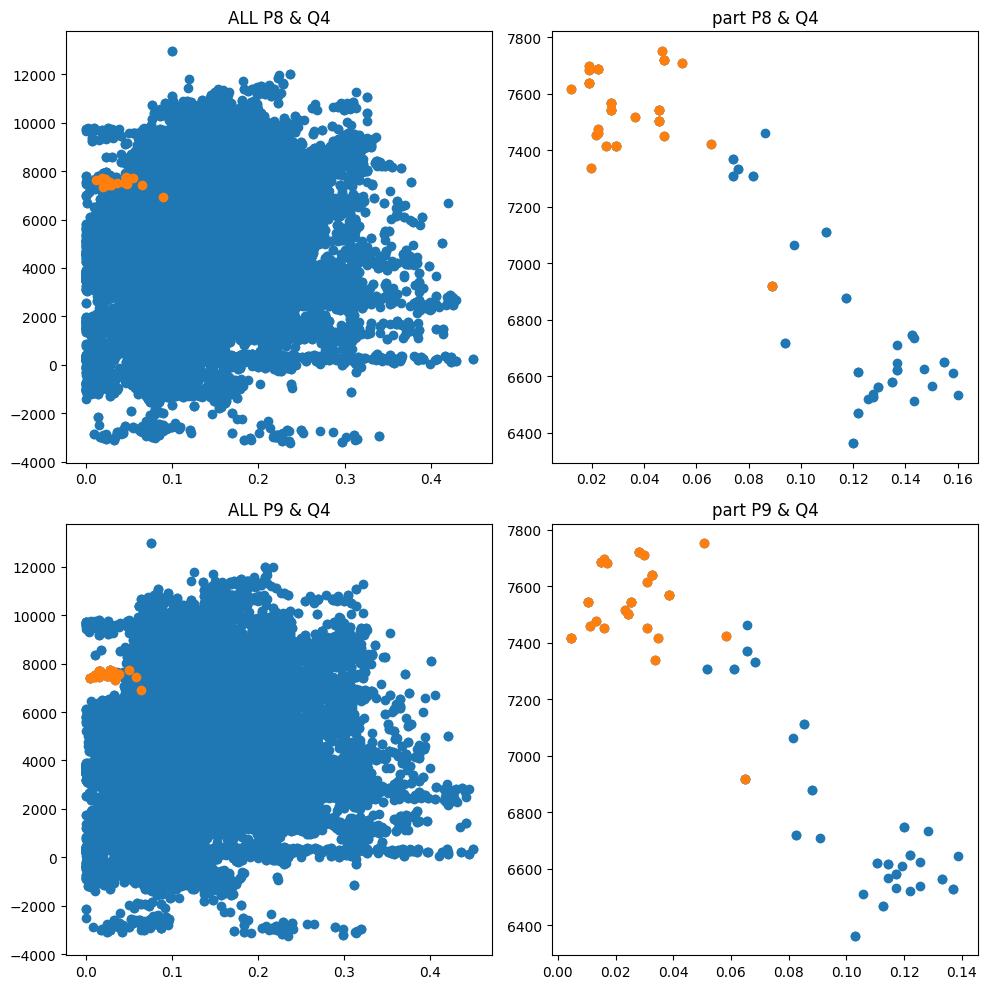

In [26]:
nn = round(np.median(df_true.index))
fig, ax =plt.subplots(2,2,figsize=(10,10))
ax[0,1].scatter(df_A[['P8']].iloc[nn -50:nn +50,:],df_A[['Q4']].iloc[nn -50:nn +50,:])
ax[0,1].scatter(df_true['P8'],df_true['Q4'])
ax[0,0].scatter(df_A['P8'],df_A['Q4'])
ax[0,0].scatter(df_true['P8'],df_true['Q4'])

ax[1,1].scatter(df_A[['P9']].iloc[nn -50:nn +50,:],df_A[['Q4']].iloc[nn -50:nn +50,:])
ax[1,1].scatter(df_true['P9'],df_true['Q4'])
ax[1,0].scatter(df_A['P9'],df_A['Q4'])
ax[1,0].scatter(df_true['P9'],df_true['Q4'])
ax[0,1].set_title('part P8 & Q4')
ax[0,0].set_title('ALL P8 & Q4')
ax[1,0].set_title('ALL P9 & Q4')

#ax[1].plot(df_A[['Q4']].iloc[nn -50:nn +50,:])
ax[1,1].set_title('part P9 & Q4')
#ax[0].axvline(x=nn, color='red', linestyle='--', linewidth=1)
#ax[1].axvline(x=nn, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

- 전체 데이터셋으로 상관성으로 봤을 때 어떠한 특징을 찾기 어려웠다
- 옆에 data는 이상치가 포함된 시점에서 일정 구간을 잘라 나타낸 것
- 이상치가 좌상단에 크게 쏠려있는 것을 확인
- 일정구간마다 데이터를 잘라서 확인해야하지 않을까?
- 구간별로 나누는 것은 데이터 스케일링에서도 적용해야하는 부분으로 보인다.

---

In [10]:
# M 변화가 없는 포인트를 찾는 알고리즘
llll = []
for N in range(len(indexM)-1):
    if (sum([(indexM[N] + indexM[N+1]) /2 > indexM[N] +50, (indexM[N] + indexM[N+1]) / 2< indexM[N+1] -50]) == 2) == True :
        llll.append(round((indexM[N] + indexM[N+1])/2 + np.random.uniform(1,10))) # +  랜덤
    else : None

## M 변수에 따른 Q와 P의 산점도
- M 변수 변화 = 1
- M 변수 변화x = 0

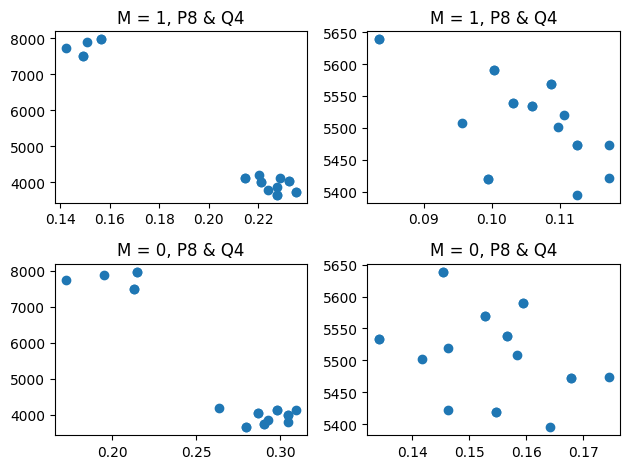

In [11]:
fig, ax = plt.subplots(2, 2)
nn = 10
# P8 플롯
ax[0,0].scatter(df_A[['P8']].iloc[indexM[nn]-10:indexM[nn]+10, :],df_A[['Q4']].iloc[indexM[nn]-10:indexM[nn]+10, :])
ax[0,0].set_title('M = 1, P8 & Q4')
#ax[0].legend()

# P9 플롯
ax[1,0].scatter(df_A[['P9']].iloc[indexM[nn]-10:indexM[nn]+10, :],df_A[['Q4']].iloc[indexM[nn]-10:indexM[nn]+10, :])
ax[1,0].set_title('M = 0, P8 & Q4')


ax[0,1].scatter(df_A[['P8']].iloc[llll[nn]-10:llll[nn]+10, :],df_A[['Q4']].iloc[llll[nn]-10:llll[nn]+10, :])
ax[0,1].set_title('M = 1, P8 & Q4')
#ax[0].legend()

# P9 플롯
ax[1,1].scatter(df_A[['P9']].iloc[llll[nn]-10:llll[nn]+10, :],df_A[['Q4']].iloc[llll[nn]-10:llll[nn]+10, :])
ax[1,1].set_title('M = 0, P8 & Q4')


# 레이아웃 조정
plt.tight_layout()
plt.show()

In [12]:
# 상관성
cor1 = []
for i in range(len(indexM)):
    nn = i
    c1 = df_A[['P8']].iloc[indexM[nn]-10:indexM[nn]+10, :].values.flatten()
    c2 = df_A[['Q4']].iloc[indexM[nn]-10:indexM[nn]+10, :].values.flatten()
    d = np.corrcoef(c1,c2)[1][0]
    cor1.append(d)


cor2 = []
for i in range(len(llll)):
    nn = i
    c1 = df_A[['P8']].iloc[llll[nn]-10:llll[nn]+10, :].values.flatten()
    c2 = df_A[['Q4']].iloc[llll[nn]-10:llll[nn]+10, :].values.flatten()
    d = np.corrcoef(c1,c2)[1][0]
    cor2.append(d)


## M 변수에 따른 상관관계 히스토그램

In [14]:
# 제공된 이상치가 포함되어있는 구간의 상관관계
a,b = df_A[['P9']].iloc[nn -50:nn +50,:].values.flatten(),df_A[['Q4']].iloc[nn -50:nn +50,:].values.flatten()
np.corrcoef(a,b)

array([[ 1.        , -0.87303764],
       [-0.87303764,  1.        ]])

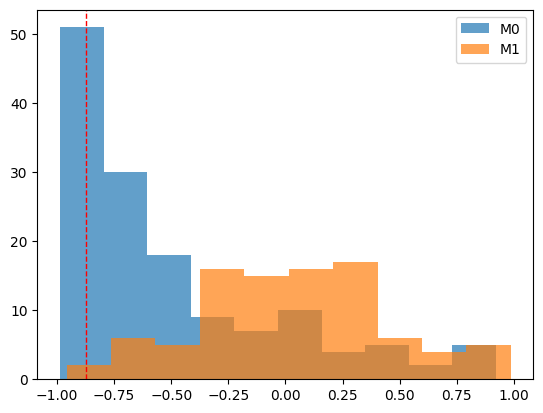

In [15]:
plt.hist(cor1,label='M0', alpha = 0.7)
plt.hist(cor2,label='M1', alpha = 0.7)
plt.axvline(x=np.corrcoef(a,b)[1,0], color='red', linestyle='--', linewidth=1)

plt.legend()

In [16]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(cor2, np.corrcoef(a,b)[1,0])

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 2.196813223686523
P-Value: 0.0305741163643813


---
# 결론

- M 변화에 있어 P 압력계가 Q와의 상관성을 띄지 않을 경우, 이상치로 의심이 가능하다.
- M 변화하지 않을 때, P 압력계가 어떠한 변화를 보일 경우, 이상치로 의심이 가능하다.
- 제공된 이상치는 M 변화하지 않을 때, 강력한 음의 상관관계를 보였다.


# 추가, 보충

- 이들의 특성을 추출할 수 있는 모형 구축을 어떻게 할 것인지 매우.. 고민
- 제공된 이상치외에도 강한 음의 상관관계를 가진 구간은 존재함 -> 왜?
- 관망구조 전체를 전혀 고려하지 못함 -> 위의 문제와도 연결되는 것으로 다른 Q,P도 고려해야한다.